# Water Quality Prediction

### Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

### 1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

### 2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

### 3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

### 4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

### 5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

### 6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

### 7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

### 8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

### 9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

### 10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


In brief-
ppm: parts per million
μg/L: microgram per litre
mg/L: milligram per litre

Column description:

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [336]:
accuracy_before = {}

In [258]:
# import the data
data = pd.read_csv('Downloads/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [182]:
# shape of the data
print('Shape of the data: Rows: {}, Columns: {}'.format(data.shape[0], data.shape[1]))

Shape of the data: Rows: 3276, Columns: 10


# Exploratory Data Analysis

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [184]:
# checking for null values
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

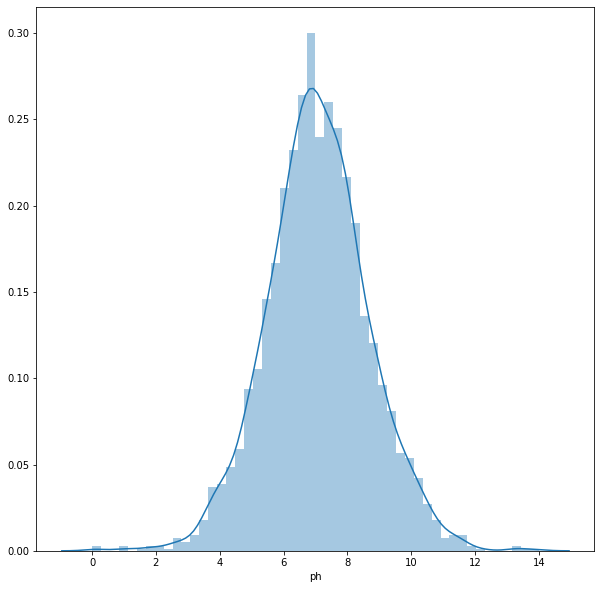

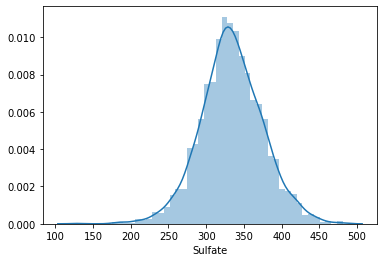

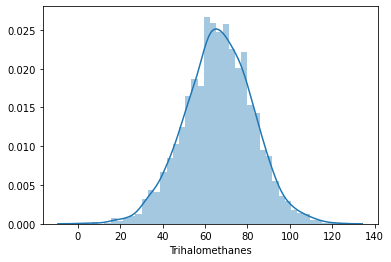

In [185]:
# Getting the distribution of columns containing null values or missing values
fig, ax = plt.subplots(figsize=(10, 10))
contains_null = ['ph', 'Sulfate', 'Trihalomethanes']
for column in contains_null:
    sns.distplot(data[column])
    plt.show()

Since the distributions seem to be non skewed for the columns containing null values, we use mean for the imputation of null values

In [186]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [187]:
def fillna(dataframe):
    dataframe.fillna(dataframe.mean(), inplace=True)
    return dataframe

In [259]:
# Filling the missing values with the mean
fillna(data)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [260]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120,1.0


In [261]:
#### Heatmap for dimensionality reduction

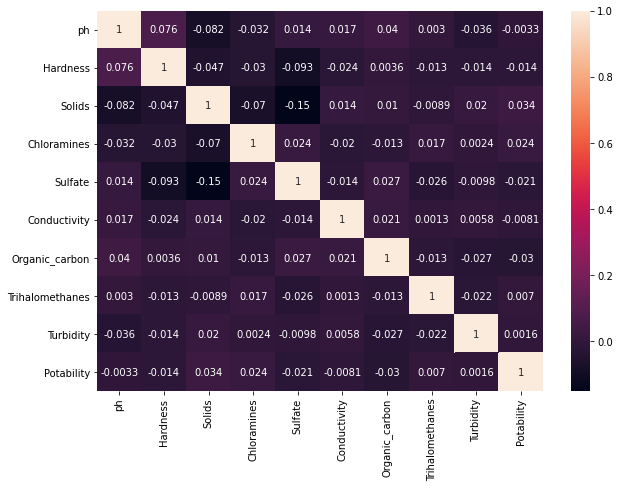

In [191]:
# heatmap to get the correlation between the features
sns.heatmap(data.corr(), annot=True)
plt.gcf().set_size_inches(10, 7)
plt.show()

We see, the correlation of every fields are low with every other fields. Hence, the dimensionality reduction is not suggsted.

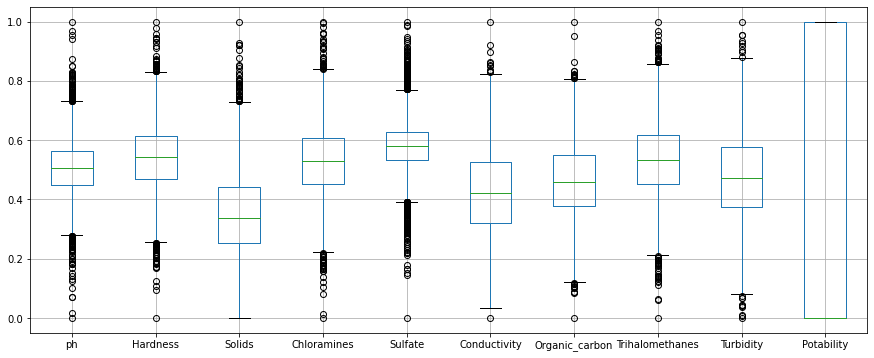

In [192]:
# check for the outliers
data.boxplot(figsize=(15, 6))
plt.show()

We are not removing outliers. It depends on the domain of the data. They may be important to decide the quality of the water

In [262]:
# check the count for good water and bad water
data['Potability'].value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

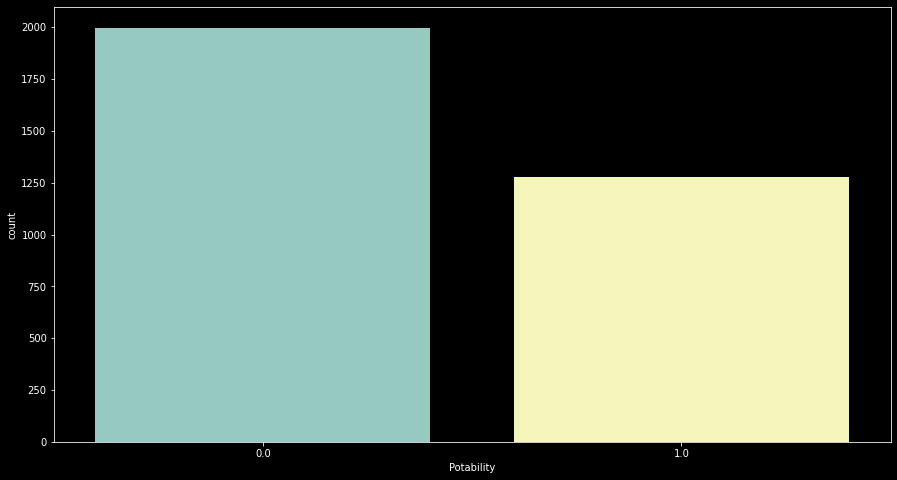

In [263]:
# countplot of potability
sns.countplot(data['Potability'])
plt.show()

In [264]:
# Partitioning the data into train and test
X = data.drop('Potability', axis=1)
Y = data['Potability']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=999)

# Model training

## Decision tree

In [337]:
# training the data with Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [338]:
# Decision tree prediction
Y_pred = dt.predict(X_test)

In [339]:
# accuracy
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f'Accuracy of the decision tree model before model optimization is {accuracy:.3f}%')
accuracy_before.__setitem__('Decision Tree', accuracy)

Accuracy of the decision tree model before model optimization is 57.317%


## Model optimization

In [141]:
# Optimizing the model using grid search and 5-fold cross validations
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
min_samples_split=range(1, 10)
parameters = dict(criterion=criterion, splitter=splitter, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=5, random_state=999)
grid_search_cv_dt = GridSearchCV(estimator=dt, param_grid=parameters, scoring='accuracy', cv=cv)
grid_search_cv_dt.fit(X_train, Y_train)
print('The best parameters are {}'.format(grid_search_cv_dt.best_params_))

The best parameters are {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}


In [151]:
# prediction of the optimised decision tree model
pred_grid = grid_search_cv_dt.predict(X_test)

In [167]:
# accuracy
accuracy = round(accuracy_score(Y_test, pred_grid), 3) * 100
print('Accuracy of the decision tree model after model optimization is {}%'.format(accuracy))
accuracy_after.append(accuracy)

Accuracy of the decision tree model after model optimization is 62.0%


## Logistic Regression

In [340]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [341]:
Y_pred = lr.predict(X_test)

In [342]:
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f'Accuracy of the Logistic regression model before model optimization is {accuracy:.3f}%')
accuracy_before.__setitem__('Logistic Regression', accuracy)

Accuracy of the Logistic regression model before model optimization is 58.994%


## Model optimization

In [215]:
# Optimizing the model using grid search and 5-fold cross validations
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [100, 150, 200, 250, 300]
multi_class = ['auto', 'ovr', 'multinomial']
parameters = dict(penalty=penalty, max_iter=max_iter, solver=solver, multi_class=multi_class)
cv = RepeatedStratifiedKFold(n_splits=5, random_state=999)
grid_search_cv_lr = GridSearchCV(estimator=lr, param_grid=parameters, scoring='accuracy', cv=cv)
grid_search_cv_lr.fit(X_train, Y_train)
print('The best parameters are {}'.format(grid_search_cv_lr.best_params_))

The best parameters are {'max_iter': 100, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


In [216]:
# prediction of the optimised logistic regression model
pred_grid = grid_search_cv_lr.predict(X_test)

In [225]:
# accuracy
accuracy = round(accuracy_score(Y_test, pred_grid), 3) * 100
print('Accuracy of the logistic regression model after model optimization is {}%'.format(accuracy))
accuracy_after.append(accuracy)

Accuracy of the logistic regression model after model optimization is 59.0%


## K-Nearest neighbours

In [343]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [344]:
Y_pred = knn.predict(X_test)

In [345]:
# accuracy
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f'Accuracy of the KNN model before model optimization is {accuracy:.3f}%')
accuracy_before.__setitem__('K-nearst neighbours', accuracy)

Accuracy of the KNN model before model optimization is 60.976%


## Model optimization

In [239]:
# Optimizing the model using grid search and 5-fold cross validations
neighbours = range(1, 30)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean', 'manhattan', 'minkowski']
parameters = dict(n_neighbors=neighbours, weights=weights, algorithm=algorithm, metric=metric)
cv = RepeatedStratifiedKFold(n_splits=5, random_state=999)
grid_search_cv_knn = GridSearchCV(estimator=knn, param_grid=parameters, scoring='accuracy', cv=cv)
grid_search_cv_knn.fit(X_train, Y_train)
print('The best parameters are {}'.format(grid_search_cv_knn.best_params_))

The best parameters are {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}


In [240]:
# prediction of the optimised model
pred_grid = grid_search_cv_knn.predict(X_test)

In [242]:
# accuracy
accuracy = round(accuracy_score(Y_test, pred_grid), 3) * 100
print('Accuracy of the KNN model after model optimization is {}%'.format(accuracy))
accuracy_after.append(accuracy)

Accuracy of the KNN model after model optimization is 62.0%


## Support Vectors

In [346]:
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

In [347]:
Y_pred = svm.predict(X_test)

In [348]:
# accuracy
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f'Accuracy of the SVC model before model optimization is {accuracy:.3f}%')
accuracy_before.__setitem__('Support Vector classifiers', accuracy)

Accuracy of the SVC model before model optimization is 64.939%


# Accuracy graph

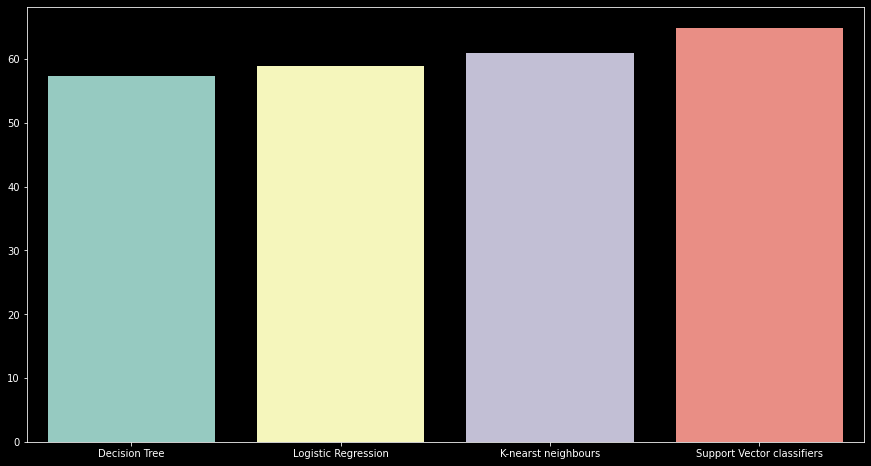

In [349]:
sns.barplot(list(accuracy_before.keys()), list(accuracy_before.values()))
plt.show()

In [350]:
accuracy_before

{'Decision Tree': 57.3170731707317,
 'Logistic Regression': 58.993902439024396,
 'K-nearst neighbours': 60.97560975609756,
 'Support Vector classifiers': 64.9390243902439}